2. a

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Set directory paths
input_dir = "Local_density_of_states_near_band_edge"  # Directory with the text files
output_dir = os.path.join(input_dir, "local_density_of_states_heatmap")  # Directory for saving heatmaps

os.makedirs(output_dir, exist_ok=True)

txt_files = [f for f in os.listdir(input_dir) if f.endswith('.txt')]

def generate_heatmap(file_path, output_path, index):
    # Read the data from the text file
    data = np.loadtxt(file_path, delimiter=",")  # assuming the values are comma-separated
    
    # Create a heatmap using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(data, cmap='viridis', aspect='auto', origin='lower', 
               extent=[0, data.shape[1], 0, data.shape[0]])  # Adjust extent if needed
    plt.colorbar(label='Local Electron Density')  # Add color bar to indicate intensity
    plt.title(f"Local Electron Density - {index + 1}")
    plt.xlabel('X Axis Label')  # Adjust these labels as per the context
    plt.ylabel('Y Axis Label')
    plt.tight_layout()

    plt.savefig(output_path)
    plt.close()

for idx, file_name in enumerate(txt_files):
    file_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, f"heatmap_{idx + 1}.png")  # Label by index (starting from 1)
    
    generate_heatmap(file_path, output_path, idx)

print("Heatmaps generated and saved.")

Heatmaps generated and saved.


2. b

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

input_dir = "Local_density_of_states_near_band_edge"  # Directory with the text files
output_dir = os.path.join(input_dir, "local_density_of_states_height")  # Directory for saving surface plots

os.makedirs(output_dir, exist_ok=True)

txt_files = [f for f in os.listdir(input_dir) if f.endswith('.txt')]

def generate_surface_plot(file_path, output_path, index):
    data = np.loadtxt(file_path, delimiter=",")  # assuming the values are comma-separated
    
    # Create a 3D surface plot using matplotlib
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = np.arange(data.shape[1])
    y = np.arange(data.shape[0])
    x, y = np.meshgrid(x, y)

    surface = ax.plot_surface(x, y, data, cmap='viridis', edgecolor='none')

    cbar = plt.colorbar(surface)
    cbar.set_label('Local Density of States')

    ax.set_xlabel('X Axis Label')  # Adjust these labels as per the context
    ax.set_ylabel('Y Axis Label')
    ax.set_zlabel('Local Density of States')
    ax.set_title(f"Local Density of States - {index + 1}")

    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

# Iterate over each text file 
for idx, file_name in enumerate(txt_files):
    file_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, f"surface_plot_{idx + 1}.png")  
    
    generate_surface_plot(file_path, output_path, idx)

print("Surface plots generated and saved.")

Surface plots generated and saved.


2. c

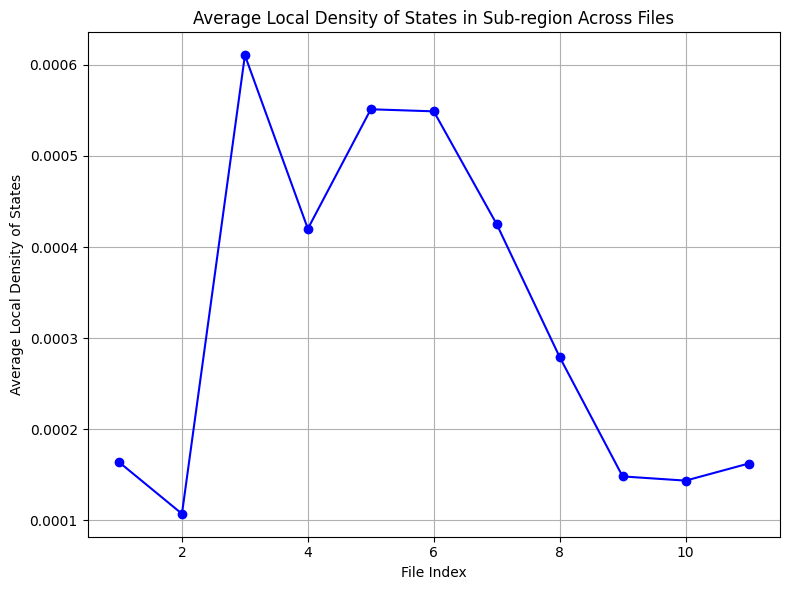

The plot of the average local density of states across different files shows significant fluctuations. The first peak occurs around file index 2, where the density sharply increases. This could indicate a localized transition in the material, possibly due to an increase in available electronic states or structural changes enhancing conductivity. Following this peak, there is a sharp drop in the local density of states, suggesting a shift in the material’s electronic properties or the depletion of available states. These fluctuations point to dynamic changes in the material's internal structure, likely influenced by phase transitions or variations in energy states.


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set directory paths
input_dir = "Local_density_of_states_near_band_edge"  # Directory with the text files

# List all .txt files in the input directory
txt_files = [f for f in os.listdir(input_dir) if f.endswith('.txt')]

# Define the sub-region to analyze (let's take a center sub-region)
sub_region_width = 50  # Width of the sub-region (number of data points in x-direction)
sub_region_height = 50  # Height of the sub-region (number of data points in y-direction)

# Function to calculate the average local density of states in a sub-region
def calculate_average_in_subregion(file_path):
    # Read the data from the text file and remove commas
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Clean the data by removing commas and converting to float
    clean_data = []
    for line in lines:
        clean_line = line.replace(',', '').split()
        clean_data.append([float(value) for value in clean_line])
    
    # Convert to NumPy array
    data = np.array(clean_data)

    # Get the sub-region (center of the matrix)
    start_x = (data.shape[1] - sub_region_width) // 2
    end_x = start_x + sub_region_width
    start_y = (data.shape[0] - sub_region_height) // 2
    end_y = start_y + sub_region_height

    sub_region = data[start_y:end_y, start_x:end_x]

    # Calculate the average value in this sub-region
    return np.mean(sub_region)

# List to store the average values for each file
averages = []

# Calculate the average for each file
for file_name in txt_files:
    file_path = os.path.join(input_dir, file_name)
    avg_local_density = calculate_average_in_subregion(file_path)
    averages.append(avg_local_density)

# Plot the average local density of states across all indices
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(txt_files) + 1), averages, marker='o', linestyle='-', color='b')
plt.xlabel('File Index')
plt.ylabel('Average Local Density of States')
plt.title('Average Local Density of States in Sub-region Across Files')
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = os.path.join(input_dir, "average_local_density_plot.png")
plt.savefig(output_path)
plt.show()

print("The plot of the average local density of states across different files shows significant fluctuations. The first peak occurs around file index 2, where the density sharply increases. This could indicate a localized transition in the material, possibly due to an increase in available electronic states or structural changes enhancing conductivity. Following this peak, there is a sharp drop in the local density of states, suggesting a shift in the material’s electronic properties or the depletion of available states. These fluctuations point to dynamic changes in the material's internal structure, likely influenced by phase transitions or variations in energy states.")